# Mašinsko učenje - Priprema za kolokvijum

Pretpostavke:
1. Instalirana biblioteka pandas `python -m pip install scikit-learn`
2. Instalirana biblioteka scikit-learn `python -m pip install pandas`

In [1]:
import numpy as np
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

## Zadatak 1
Učitati skup podataka abalone.csv. Izdvojiti kolone Viscera weight i Length. Iscrtati grafik za ove kolone. Podeliti skup podataka na obučavajući i test skup u odnosu 80:20. Na osnovu atributa Length odrediti vrednost atributa Viscera weight. Koristiti linearnu regresiju. Izmeriti grešku modela nad test podacima. Grafički prikazati rezultate model.

0.8013949594161079


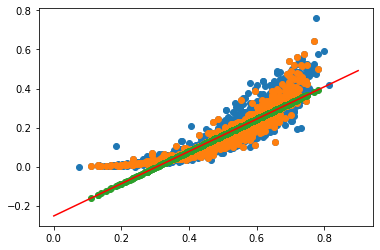

In [2]:
# ucitavanje podataka
abalone = pandas.read_csv("datasets/abalone.csv")

# izdvajanje kolona Vicera weeight i Length
# indeksiranje po kljucu, pristupanje po kljucu
viscera_weight = abalone["Viscera weight"]            # y
length = abalone["Length"]                            # x
viscera_weight
length

# crtanje grafika (plot, scatter, matshow)
# scatter da prikaze podatke kao tackice
plt.scatter(length, viscera_weight)

# podela podataka na train i test
train_x, test_x, train_y, test_y = train_test_split(length, viscera_weight, test_size=0.2)

# pravljenje modela za linearnu regresiju
lin_reg = LinearRegression()
train_x = train_x.to_numpy().reshape(-1, 1)
test_x = test_x.to_numpy().reshape(-1, 1)
train_y = train_y.to_numpy().reshape(-1, 1)
test_y = test_y.to_numpy().reshape(-1, 1)

lin_reg.fit(train_x, train_y)

# iscrtavanje linearne regresij
# interval za crtanje
x = np.linspace(0, 0.9, 10000).reshape(-1,1)
plt.plot(x, lin_reg.predict(x), c= "r") # model za lin reg

# test podaci
# podaci koje vrati nas model
plt.scatter(test_x, test_y)
plt.scatter(test_x, lin_reg.predict(test_x))

# merenje greske modela
print(lin_reg.score(test_x, test_y))

Podizanje na drugi stepen za bolju tacnost, treba paziti da ne preteramo

0.8810074835576874


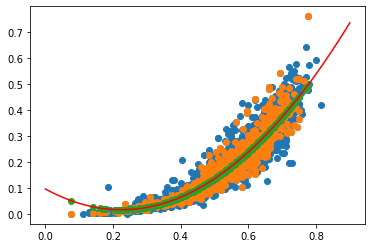

In [3]:
# ucitavanje podataka
abalone = pandas.read_csv("datasets/abalone.csv")

# izdvajanje kolona Vicera weeight i Length
# indeksiranje po kljucu, pristupanje po kljucu
viscera_weight = abalone["Viscera weight"]            # y
length = abalone["Length"]                            # x
viscera_weight
length

# crtanje grafika (plot, scatter, matshow)
# scatter da prikaze podatke kao tackice
plt.scatter(length, viscera_weight)

# podela podataka na train i test
train_x, test_x, train_y, test_y = train_test_split(length, viscera_weight, test_size=0.2)

# pravljenje modela za linearnu regresiju
lin_reg = LinearRegression()
train_x = train_x.to_numpy().reshape(-1, 1)
train_x2 = np.column_stack([train_x, train_x**2])
test_x = test_x.to_numpy().reshape(-1, 1)
test_x2 = np.column_stack([test_x, test_x**2])
train_y = train_y.to_numpy().reshape(-1, 1)
test_y = test_y.to_numpy().reshape(-1, 1)

lin_reg.fit(train_x2, train_y)

# iscrtavanje linearne regresij
# interval za crtanje
x = np.linspace(0, 0.9, 10000).reshape(-1,1)
x2 = np.column_stack([x, x**2])
plt.plot(x, lin_reg.predict(x2), c= "r") # model za lin reg

# merenje greske modela
print(lin_reg.score(test_x2, test_y))
# test podaci
# podaci koje vrati nas model
plt.scatter(test_x, test_y)
plt.scatter(test_x, lin_reg.predict(test_x2))

## Zadatak 2
Učitati skup podataka iris.csv. Izdvojiti prvu, drugu i poslednju kolonu. Poslednja kolona predstavlja klasu. Iscrtati grafik za ove kolone. Podeliti skup podataka na obučavajući i test skup u odnosu 80:20. Na osnovu prve dve kolone odrediti odrediti klasu kojoj instanca pripada. Koristiti neki od algoritama za klasifikaciju. Izmeriti grešku modela nad test podacima. Grafički prikazati rezultate model.

0.7666666666666667


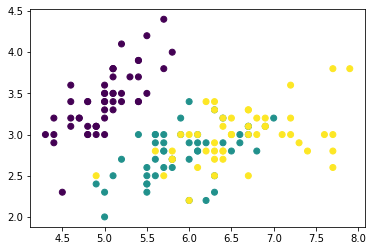

In [4]:
# pandas mora da igrnorise prvu kolinu kao zaglavlje 
# ucitavanje podataka
iris = pandas.read_csv("datasets/iris.csv", header=None)

# izdvajanje kolona prva, druga i poslednja
x = iris.loc[:,:1].to_numpy()
y = iris[4].to_numpy()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# crtanje grafika (plot, scatter, matshow)
# scatter da prikaze podatke kao tackice
plt.scatter(x[:,0], x[:,1], c=y)

# podela podataka na train i test
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

# klasifikator za podatke
klasifikator = KNeighborsClassifier(n_neighbors=5)
klasifikator.fit(train_x, train_y)

# greska
print(klasifikator.score(test_x, test_y))


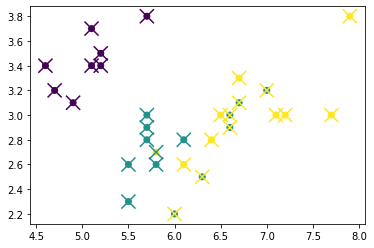

In [5]:
plt.scatter(test_x[:,0], test_x[:,1], c=test_y)
plt.scatter(test_x[:,0], test_x[:,1], c=klasifikator.predict(test_x), marker="x", s = 200)

## Logisticka regresija

0.9333333333333333


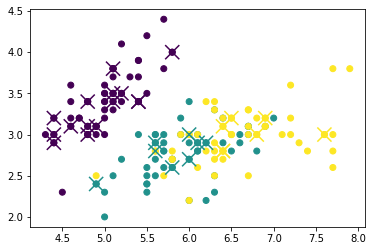

In [6]:

iris = pandas.read_csv("datasets/iris.csv", header= None)
x = iris.loc[:,:1].to_numpy()
y = iris[4].to_numpy()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# crtanje grafika (plot, scatter, matshow)
# scatter da prikaze podatke kao tackice
plt.scatter(x[:,0], x[:,1], c=y)

# podela podataka na train i test
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

klasifikator = LogisticRegression()
klasifikator.fit(train_x, train_y)

print(klasifikator.score(test_x, test_y))
plt.scatter(test_x[:,0], test_x[:,1], c=test_y)
plt.scatter(test_x[:,0], test_x[:,1], c=klasifikator.predict(test_x), marker="x", s = 200)


In [7]:
# vrednost u jednoj tacki
print(lin_reg.predict([[3,9]]))

[[12.15034574]]


## Zadatak 3
Učitati skup podataka churn.csv. Na osnovu svih atributa u skupu podatak potrebno je odrediti vrednost atributa churn. Obrazložiti izbor modela kao i transformacija sprovedenih nad podacima. Izračunati tačnost modela.

In [12]:
# izmeriti tacnost po svakoj klasi: izbrojiti broj tacno izracuntih primera i podeliti sa ukupnim broojem

#ucitavanje pdataka
churn = pandas.read_csv("datasets/churn.csv")
churn



State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0       KS             128        415  382-4657         no        yes   
1       OH             107        415  371-7191         no        yes   
2       NJ             137        415  358-1921         no         no   
3       OH              84        408  375-9999        yes         no   
4       OK              75        415  330-6626        yes         no   
...    ...             ...        ...       ...        ...        ...   
3328    AZ             192        415  414-4276         no        yes   
3329    WV              68        415  370-3271         no         no   
3330    RI              28        510  328-8230         no         no   
3331    CT             184        510  364-6381        yes         no   
3332    TN              74        415  400-4344         no        yes   

      VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  \
0                25     265.1        110       45.07  ...         99   
1                26     161.6        123       27.47  ...        103   
2                 0     243.4        114       41.38  ...        110   
3                 0     299.4         71       50.90  ...         88   
4                 0     166.7        113       28.34  ...        122   
...             ...       ...        ...         ...  ...        ...   
3328             36     156.2         77       26.55  ...        126   
3329              0     231.1         57       39.29  ...         55   
3330              0     180.8        109       30.74  ...         58   
3331              0     213.8        105       36.35  ...         84   
3332             25     234.4        113       39.85  ...         82   

      Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  \
0          16.78       244.7           91         11.01       10.0   
1          16.62       254.4          103         11.45       13.7   
2          10.30       162.6          104          7.32       12.2   
3           5.26       196.9           89          8.86        6.6   
4          12.61       186.9          121          8.41       10.1   
...          ...         ...          ...           ...        ...   
3328       18.32       279.1           83         12.56        9.9   
3329       13.04       191.3          123          8.61        9.6   
3330       24.55       191.9           91          8.64       14.1   
3331       13.57       139.2          137          6.26        5.0   
3332       22.60       241.4           77         10.86       13.7   

      Intl Calls  Intl Charge  CustServ Calls  Churn?  
0              3         2.70               1  False.  
1              3         3.70               1  False.  
2              5         3.29               0  False.  
3              7         1.78               2  False.  
4              3         2.73               3  False.  
...          ...          ...             ...     ...  
3328           6         2.67               2  False.  
3329           4         2.59               3  False.  
3330           6         3.81               2  False.  
3331          10         1.35               2  False.  
3332           4         3.70               0  False.  

[3333 rows x 21 columns]

## Zadatak 4
Učitati skup podataka cpu.csv. Na osnovu svih atributa u skupu podatak potrebno je odrediti vrednost atributa fork. Obrazložiti izbor modela kao i transformacija sprovedenih nad podacima. Izračunati tačnost modela.

## Zadatak 5
Na osnovu podataka dostavljenih u datoteci winequality-red.csv odrediti napraviti model za određivanje kvaliteta vina. Obrazložiti izbor modela i transformacije primenjene nad podacima. Izračunati tačnost modela.